<img src= "https://s26162.pcdn.co/wp-content/uploads/sites/3/2021/02/titanic-feat1.jpg" alt ="Titanic" style="height: 300px; width:auto; border-radius: 10px; align: center;">

# Introduction

<ol style="font-family: 'Poppins', sans-serif; font-size: 16px;">
    <li>PassengerId is the unique id of the row and it doesn't have any effect on target</li>
    <li>Survived is the target variable we are trying to predict (0 or 1):
        <ul>
            <li>1 = Survived</li>
            <li>0 = Not Survived</li>
        </ul>
    </li>
    <li>Pclass (Passenger Class) is the socio-economic status of the passenger and it is a     
        categorical ordinal feature which has 3 unique values (1, 2 or 3):
        <ul>
            <li>1 = Upper Class</li>
            <li>2 = Middle Class</li>
            <li>3 = Lower Class</li>
        </ul>                
    </li>
    <li>Name, Sex and Age are self-explanatory</li>
    <li>SibSp is the total number of the passengers' siblings and spouse</li>
    <li>Parch is the total number of the passengers' parents and children</li>
    <li>Ticket is the ticket number of the passenger</li>
    <li>Fare is the passenger fare</li>
    <li>Cabin is the cabin number of the passenger</li>
    <li>Embarked is port of embarkation and it is a categorical feature which has 3 unique
                values (C, Q or S):
        <ul>
            <li>C = Cherbourg</li>
            <li>Q = Queenstown</li>
            <li>S = Southampton</li>
        </ul>
</ol>

# 1. Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# Loading datasets
df_train = pd.read_csv("train.csv")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
(df_train.isnull().sum() / len(df_train)) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<ul style="font-family: 'Poppins', sans-serif; font-size: 16px;"><li>Significant amount of data is missing from the Cabin Column. I'll most probably drop this whole column since it has to many values missing with 77%</li><li>Age column also has missing values but I'll replace these with mean or median in the data preprocessing section.</li><li>Embarked also has missing values.</li></ul>

In [8]:
def data_info(data):
    cols = data.columns
    unique_val = [data[col].value_counts().head(10).index.to_numpy() for col in cols]
    n_uniques = [data[col].nunique() for col in cols]
    dtypes = [data[col].dtype for col in cols]
    nulss = [data[col].isnull().sum() for col in cols]
    dup = [data.duplicated().sum() for col in cols]
    return pd.DataFrame({'Col': cols, 'dtype': dtypes, 'n_uniques': n_uniques, 'n_nan': nulss, 'unique_val': unique_val, 'duplicated': dup})


In [9]:
data_info(df_train)

,Col,dtype,n_uniques,n_nan,unique_val,duplicated
0,PassengerId,int64,891,0,"[1, 599, 588, 589, 590, 591, 592, 593, 594, 595]",0
1,Survived,int64,2,0,"[0, 1]",0
2,Pclass,int64,3,0,"[3, 1, 2]",0
3,Name,object,891,0,"[Braund, Mr. Owen Harris, Boulos, Mr. Hanna, F...",0
4,Sex,object,2,0,"[male, female]",0
5,Age,float64,88,177,"[24.0, 22.0, 18.0, 19.0, 28.0, 30.0, 21.0, 25....",0
6,SibSp,int64,7,0,"[0, 1, 2, 4, 3, 8, 5]",0
7,Parch,int64,7,0,"[0, 1, 2, 5, 3, 4, 6]",0
8,Ticket,object,681,0,"[347082, CA. 2343, 1601, 3101295, CA 2144, 347...",0
9,Fare,float64,248,0,"[8.05, 13.0, 7.8958, 7.75, 26.0, 10.5, 7.925, ...",0


### Categorical Features in traning Data

In [10]:
Categorical_Features=["Survived","Pclass","Sex","SibSp","Parch","Embarked"]

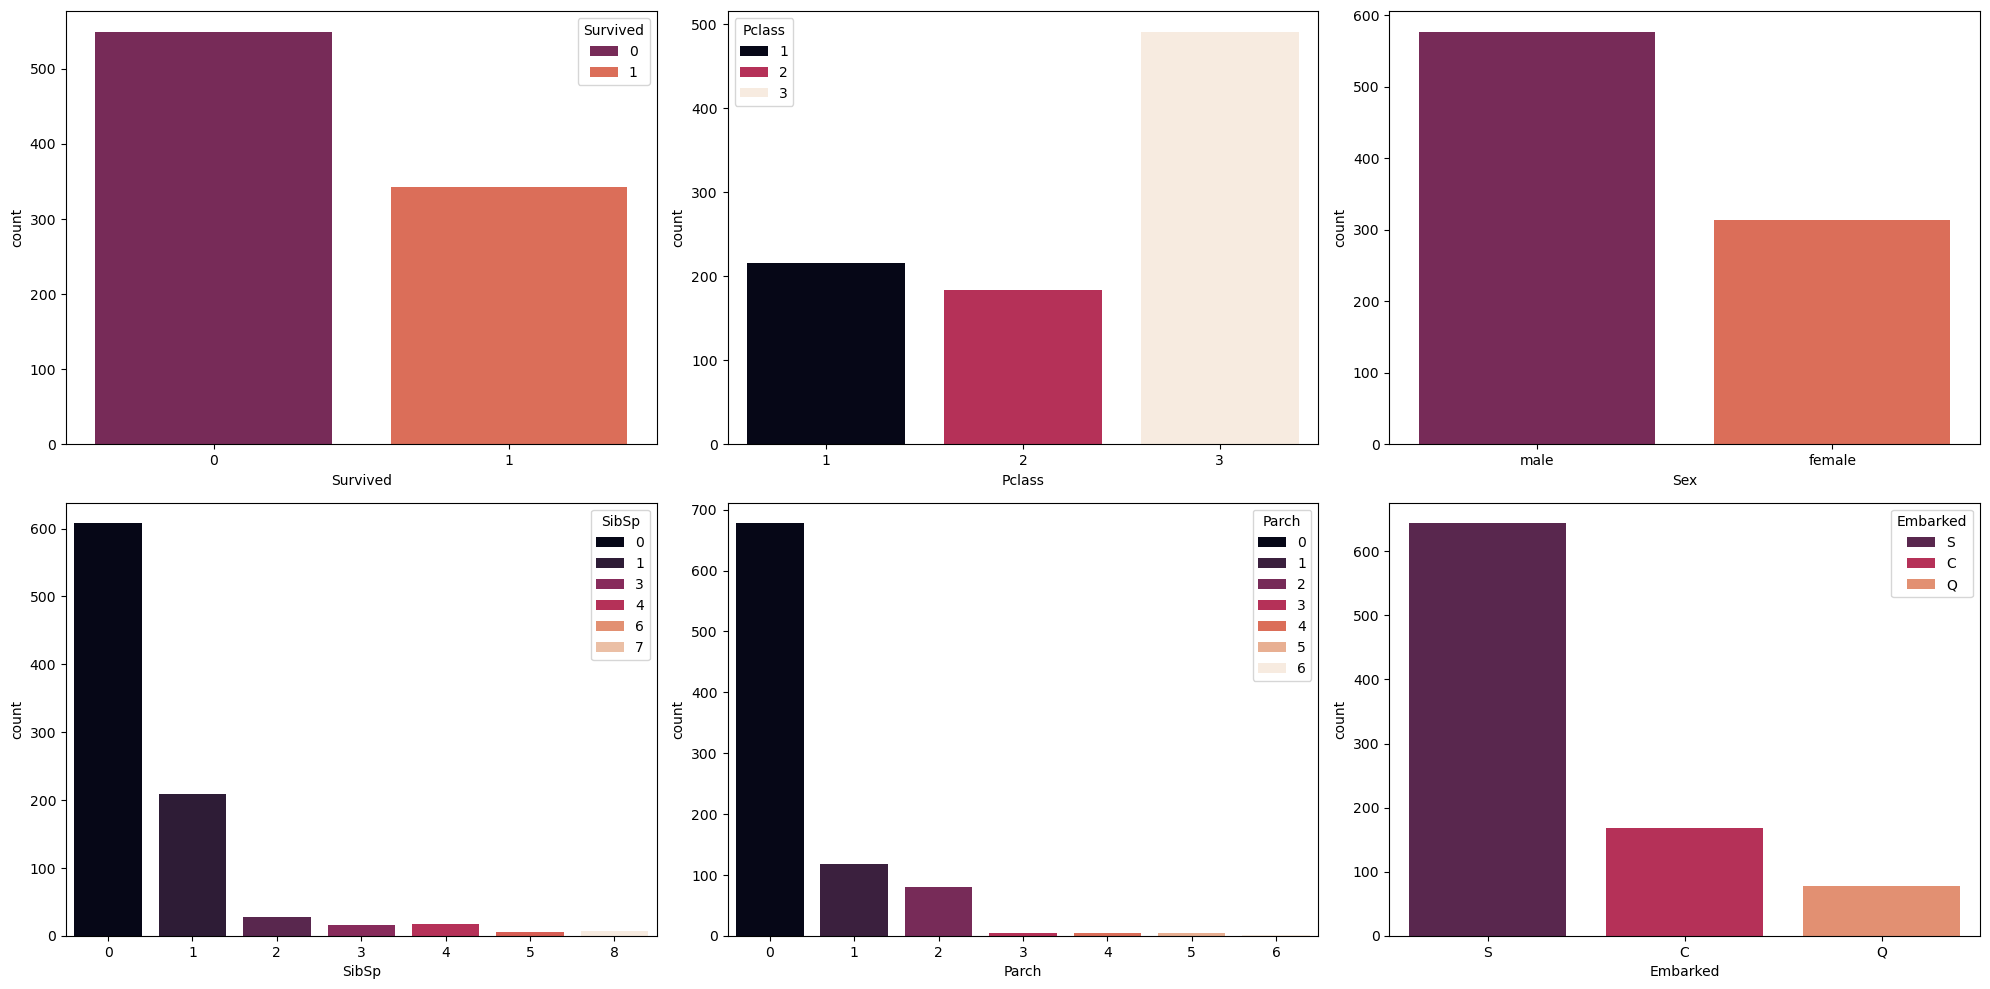

In [11]:
plt.figure(figsize=(20, 10))
for i in range(len(Categorical_Features)):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=df_train[Categorical_Features[i]],palette="rocket",hue=df_train[Categorical_Features[i]])
plt.tight_layout()
plt.show()



In [12]:
def categorical_plot(data, columns,numbers_of_cat_value):
    total_cols = 3
    total_rows = math.ceil(len(columns) / total_cols)
    plt.figure(figsize=(20, 5 * total_rows))
    plot_idx = 1
    for column in columns:
        if len(data[column].unique()) < numbers_of_cat_value:
            plt.subplot(total_rows, total_cols, plot_idx)
            sns.countplot(x=data[column], palette="rocket", hue=data[column])
            plt.title(f"Count Plot of {column}")
            plot_idx += 1
        else:
            print(f"Column '{column}' is not categorical.")
    plt.tight_layout()
    plt.show()

Column 'PassengerId' is not categorical.
Column 'Name' is not categorical.
Column 'Age' is not categorical.
Column 'Ticket' is not categorical.
Column 'Fare' is not categorical.
Column 'Cabin' is not categorical.


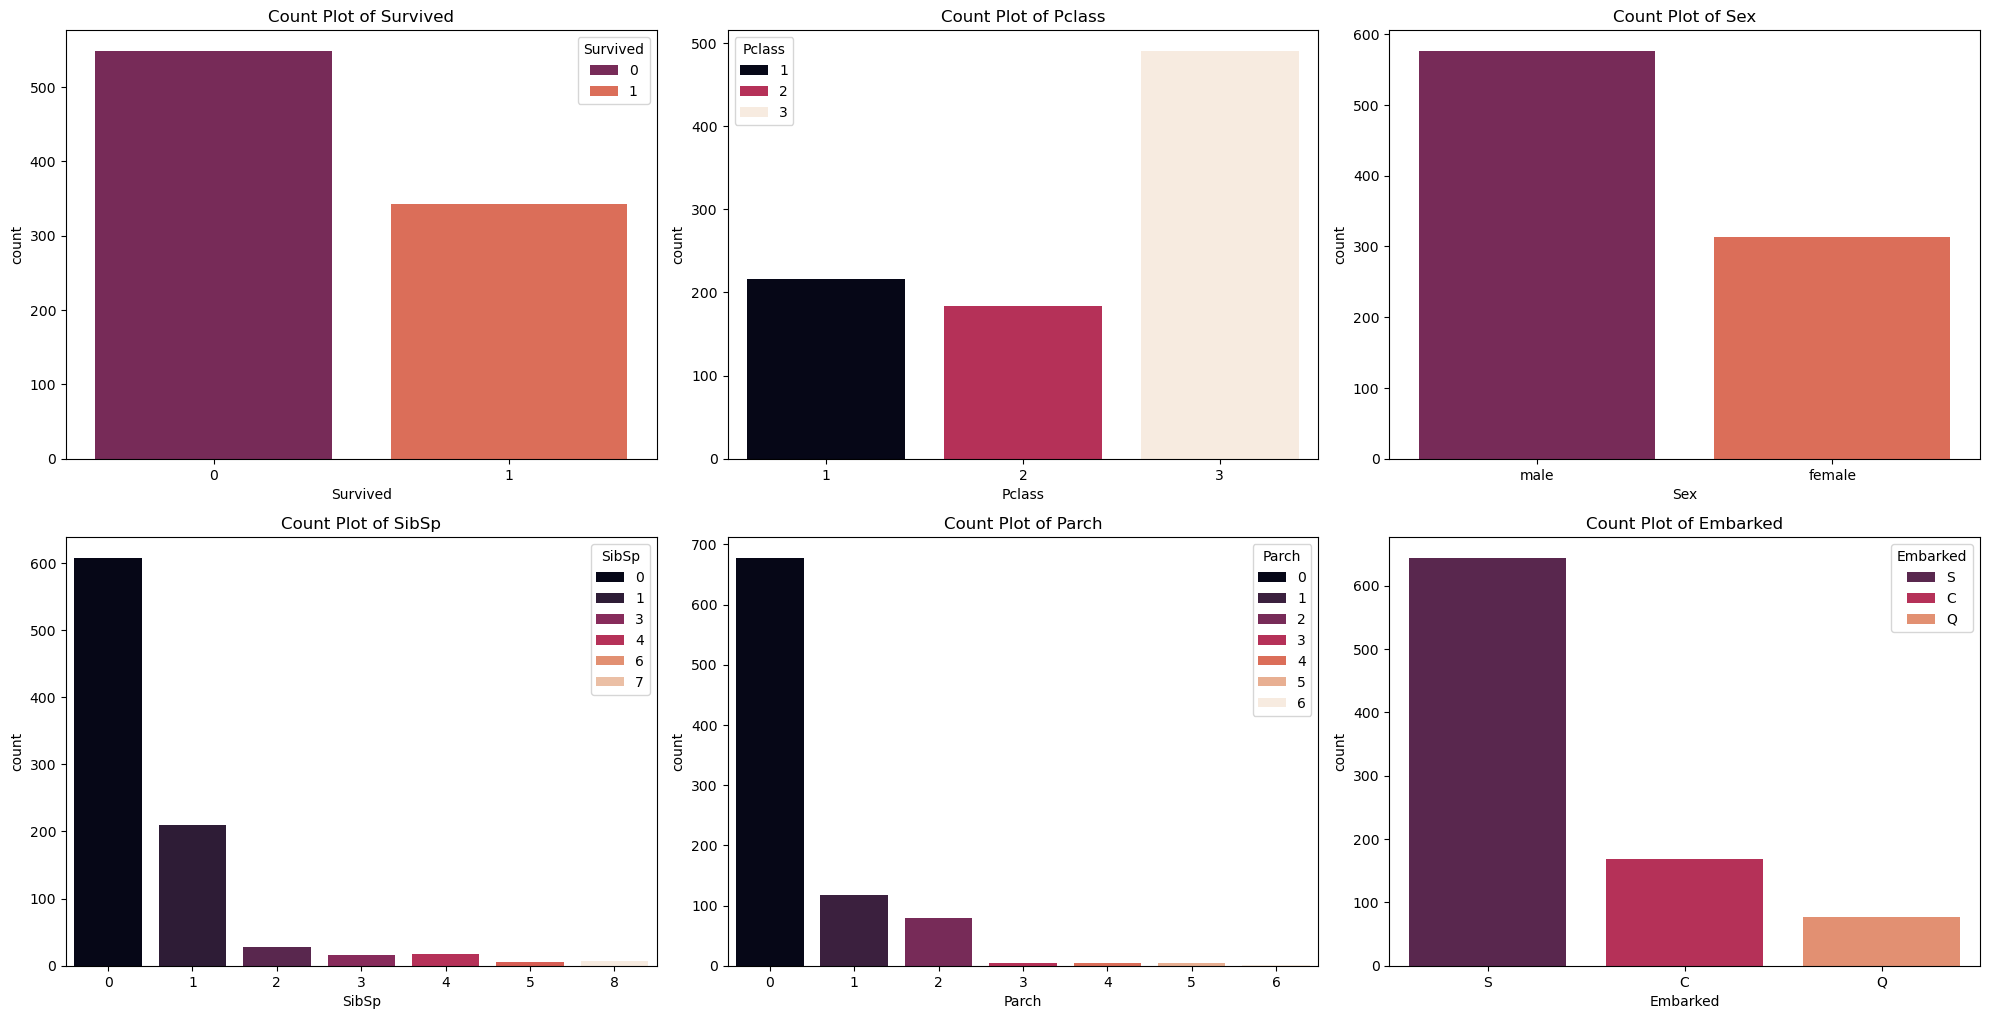

In [13]:
categorical_plot(df_train, df_train.columns,10)

<h3 style="font-family: 'Poppins', sans-serif; font-size: 20px; font-weight: 500;">Interpretations from the above countplots</h3>
<ul style="font-family: 'Poppins', sans-serif; font-size: 16px;">
    <li>More than 60% people enlisted in this training data did not survive.</li>
    <li>Majority of the people were from Passenger Class 3.</li>
    <li>There were more number of males than females.</li>
    <li>There were more number of people without Siblings or Spouses.</li>
    <li>There were more number of people without Parents or Children</li>
    <li>Large number of people who embarked were from Southamptom.</li>
</ul>

### Continuous  Features in the training data

In [14]:
Continuous_Features=["Age","Fare"]

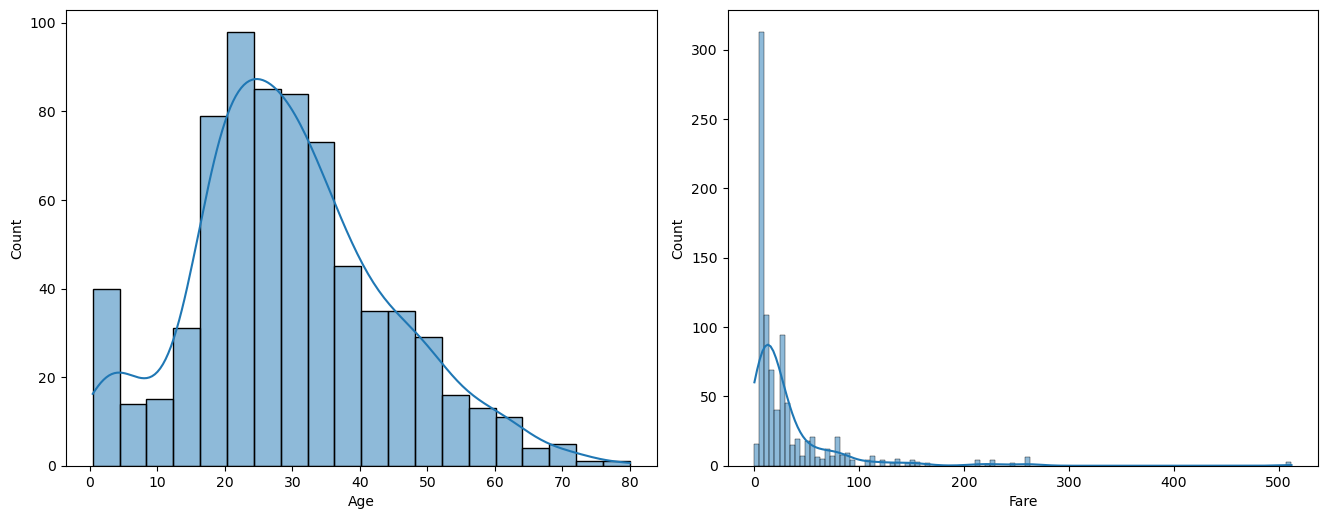

In [15]:
plt.figure(figsize=(20, 10),)
for i in range(len(Continuous_Features)):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_train[Continuous_Features[i]],kde=True)
plt.tight_layout()
plt.show()

<h3 style="font-family: 'Poppins', sans-serif; font-size: 20px; font-weight: 500;">Interpretations from the above KDE plots</h3>
<ul style="font-family: 'Poppins', sans-serif; font-size: 16px;">
    <li>A large number of people were between the age of 20 and 50 years of age.</li>
    <li>Fares Column has a skewed distribution. We have to scale it accordingly so that it doesn't interfere with our accuracy.</li>
</ul>

In [16]:
df_train.skew(numeric_only=True)

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [17]:
df_train["PassengerId"].value_counts().iloc[0]

1

In [18]:
def continuous_plot(data, columns,numbers_of_cat_value):
    total_cols = 3
    total_rows = math.ceil(len(columns) / total_cols)
    plt.figure(figsize=(20, 5 * total_rows))
    plot_idx = 1
    for column in columns:
        if (data[column].nunique()) > numbers_of_cat_value and (data[column].dtype != 'object') and (data[column].value_counts().iloc[0]>=numbers_of_cat_value):
            plt.subplot(total_rows, total_cols, plot_idx)
            sns.histplot(data[column])
            plt.title(f"histograme plot of {column}")
            plot_idx += 1
        else:
            print(f"Column '{column}' is not countinuous.")
    plt.tight_layout()
    plt.show()


Column 'PassengerId' is not countinuous.
Column 'Survived' is not countinuous.
Column 'Pclass' is not countinuous.
Column 'Name' is not countinuous.
Column 'Sex' is not countinuous.
Column 'SibSp' is not countinuous.
Column 'Parch' is not countinuous.
Column 'Ticket' is not countinuous.
Column 'Cabin' is not countinuous.
Column 'Embarked' is not countinuous.


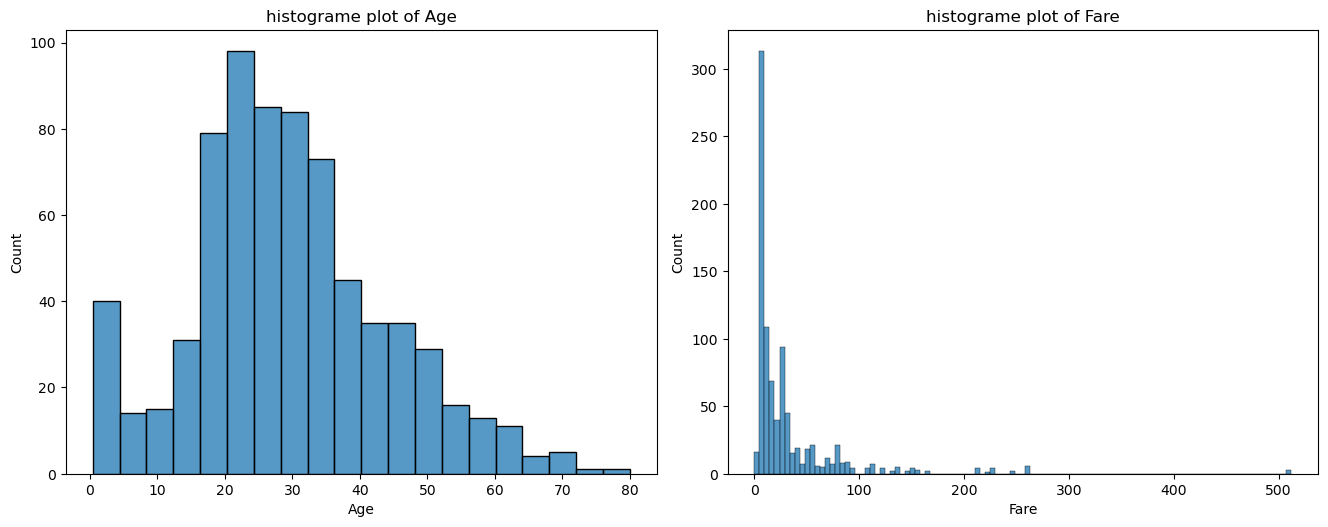

In [19]:
continuous_plot(df_train, df_train.columns,10)

<h3 style="font-family: 'Poppins', sans-serif; font-size: 20px; font-weight: 500;">Interpretations from the above KDE plots</h3>
<ul style="font-family: 'Poppins', sans-serif; font-size: 16px;">
    <li>A large number of people were between the age of 20 and 50 years of age.</li>
    <li>Fares Column has a skewed distribution. We have to scale it accordingly so that it doesn't interfere with our accuracy.</li>
</ul>

### Categorical Features wrt Traget

In [20]:
def categorical_plot_wrt_Traget(data, columns,target):
    total_cols = 3
    total_rows = math.ceil(len(columns) / total_cols)
    plt.figure(figsize=(20, 5 * total_rows))
    plot_idx = 1
    for column in columns:
        if len(data[column].unique()) < 10:
            plt.subplot(total_rows, total_cols, plot_idx)
            sns.countplot(x=data[column], palette="rocket", hue=data[target])
            plt.title(f"Count Plot of {column} wrt Survived ")
            plot_idx += 1
        else:
            print(f"Column '{column}' is not categorical.")
    plt.tight_layout()
    plt.show()

Column 'PassengerId' is not categorical.
Column 'Name' is not categorical.
Column 'Age' is not categorical.
Column 'Ticket' is not categorical.
Column 'Fare' is not categorical.
Column 'Cabin' is not categorical.


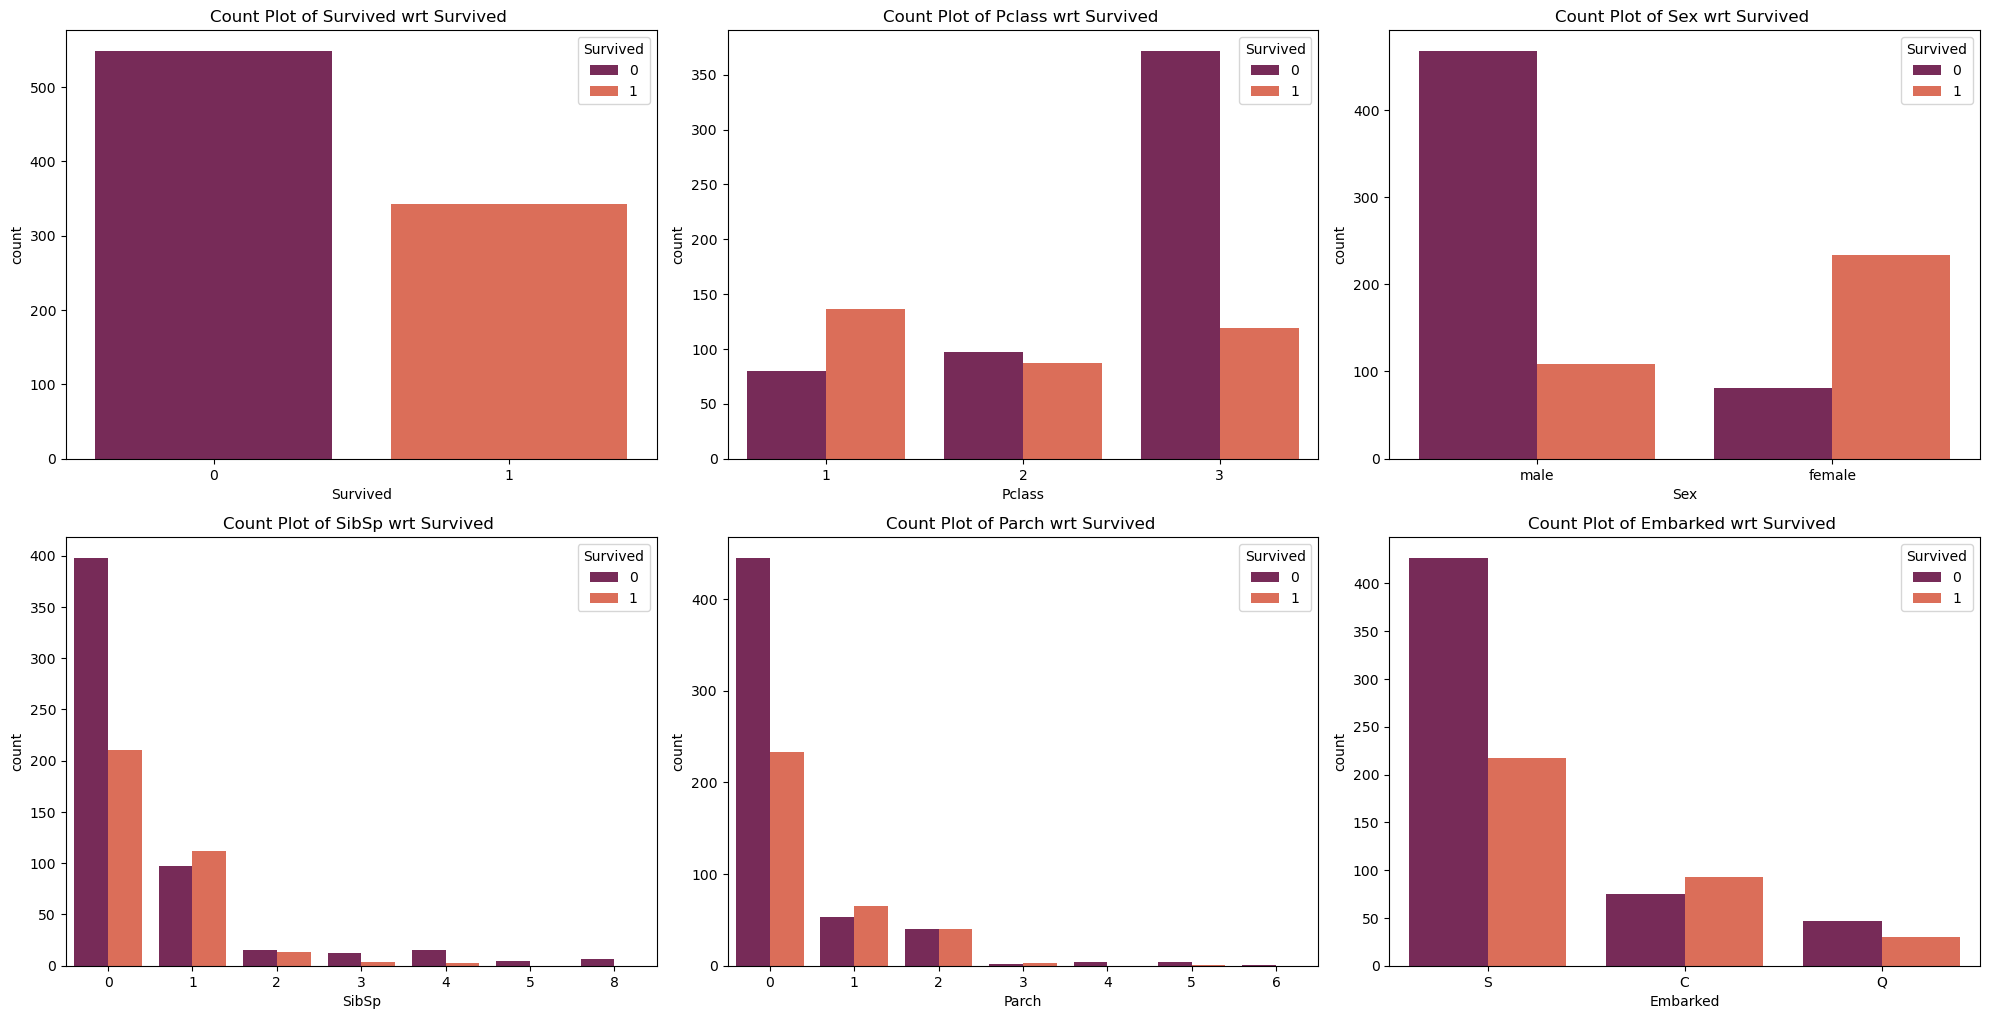

In [21]:
categorical_plot_wrt_Traget(df_train,df_train.columns,"Survived")

<h3 style="font-family: 'Poppins', sans-serif; font-size: 20px; font-weight: 500;">Interpretations from the above plots</h3>
<ul style="font-family: 'Poppins', sans-serif; font-size: 16px;">
    <li>Majority of the people that died were from Passenger Class 3 and more survived in the first class.</li>
    <li>Majority of the people that died were males.</li>
    <li>It was observed that many people who did not have siblings or spuses did not survive.</li>
    <li>Also, people without Parents or Children did not have much chances of survival either.</li>
    <li>Since large number of people embarked from Southampton, the number of deaths of people from Southamptom was more.</li>
</ul>

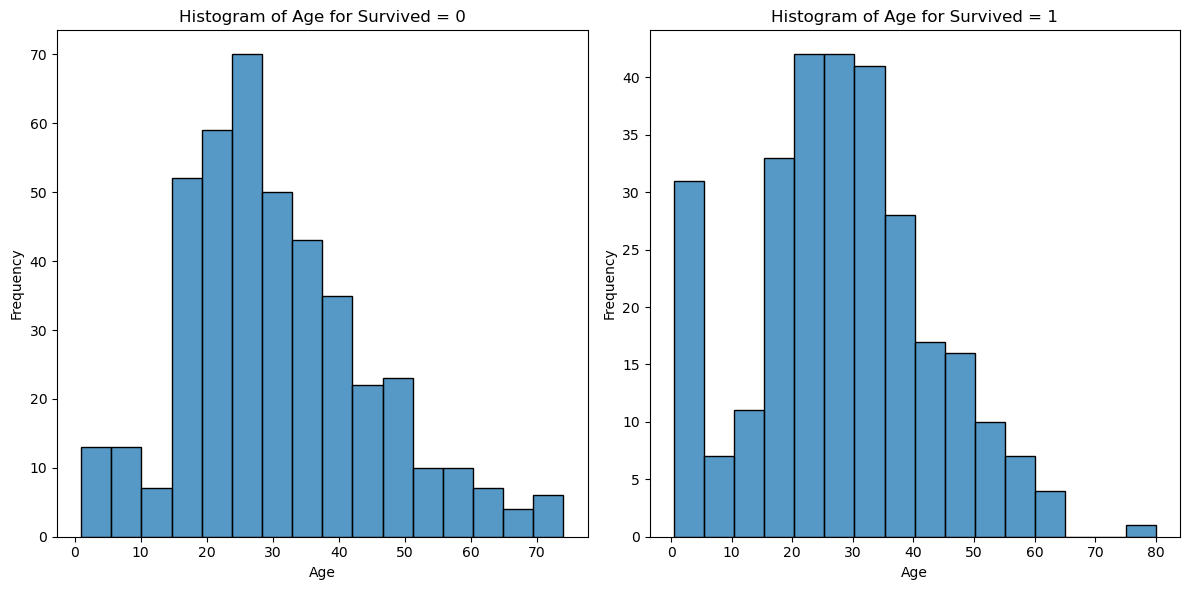

In [22]:
import matplotlib.pyplot as plt

# Group by 'Survived' column and select the 'Age' column
df_train_grouped = df_train.groupby("Survived")["Age"]

plt.figure(figsize=(12, 6))

# Plot for Survived = 0
plt.subplot(1, 2, 1)
sns.histplot(df_train_grouped.get_group(0))
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age for Survived = 0")

# Plot for Survived = 1
plt.subplot(1, 2, 2)
sns.histplot(df_train_grouped.get_group(1))
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age for Survived = 1")

plt.tight_layout()
plt.show()


<li>Large number of people who died were aged between 20 and 50.</li>

### correlation

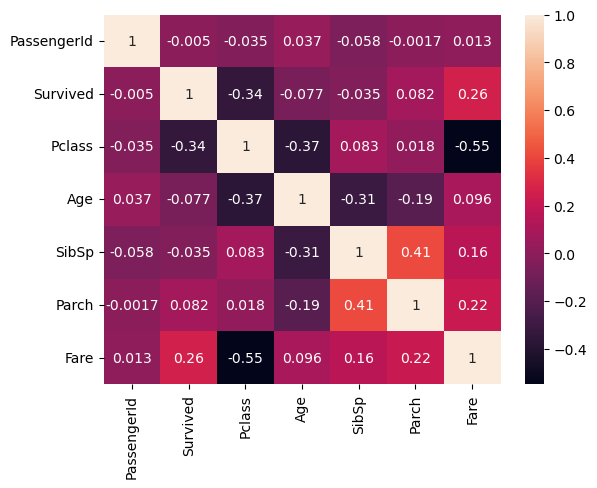

In [23]:
sns.heatmap(df_train.corr(numeric_only=True), annot=True, cmap="rocket");

<ul style="font-family: 'Poppins', sans-serif; font-size: 16px;">
    <li>Pclass has a good negative correlation with Fare. Its kinda obvious that as Pclass increases Fare will decrease(Third Class will cost less than First class).</li>
    <li>Fare also has minor positive correlation with Survived. Again people who paid more had more chances of survival.</li>
    <li>SibSp has good positive correlation with Parch. We can concatenate these together into a single family column later on.</li>
</ul>

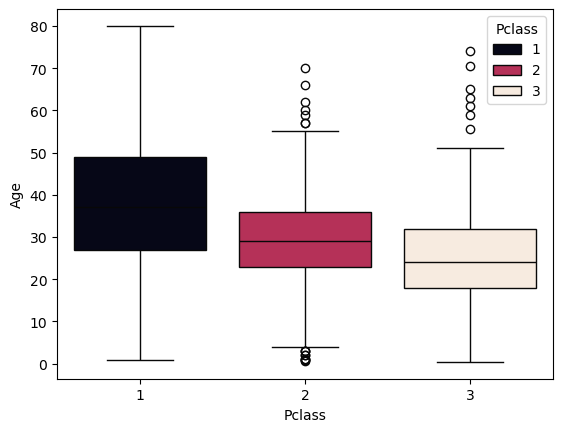

In [24]:
sns.boxplot(x = "Pclass", y= "Age", palette = "rocket", data = df_train,hue="Pclass");

<h3 style="font-family: 'Poppins', sans-serif; font-size: 20px; font-weight: 500;">Interpretations from the above boxenplots</h3>
<ul style="font-family: 'Poppins', sans-serif; font-size: 16px;">
    <li>Pclass 1 had people mostly had people aged between 30 and 50 years. It might be because the more aged people might have better jobs and finances to afford first class.</li>
    <li>Pclass 2 had people aged between 20-40 more.</li>
    <li>Pclass 3 had more people age between 20-30</li>
</ul>

### Detect the outlier

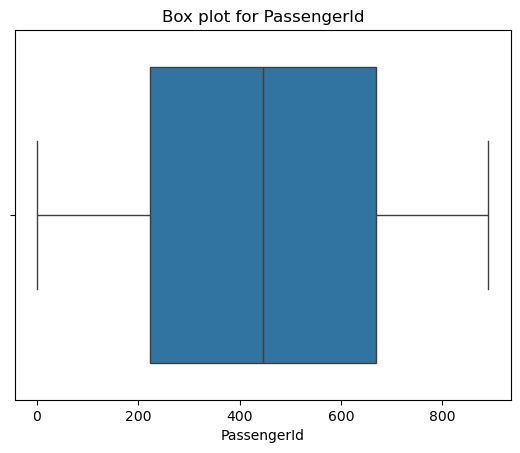

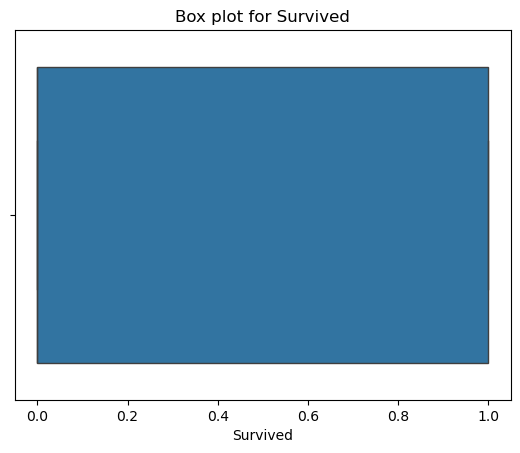

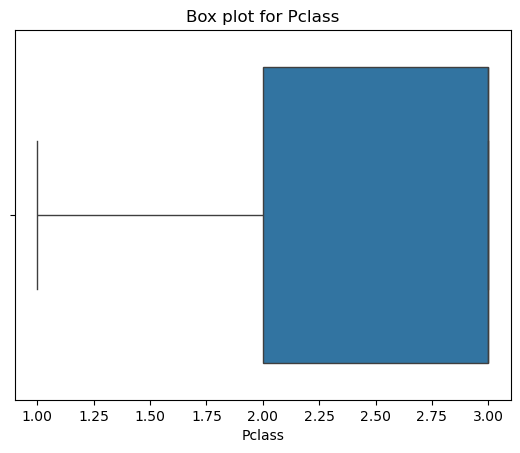

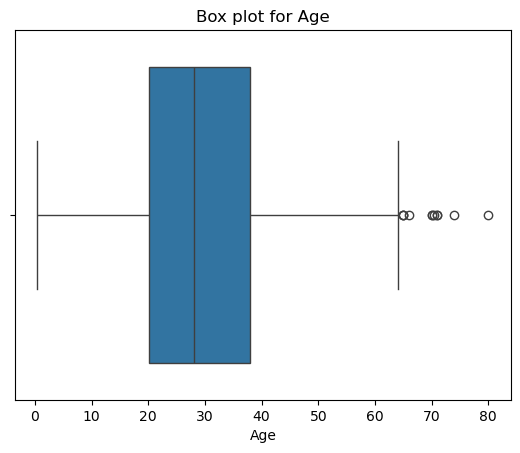

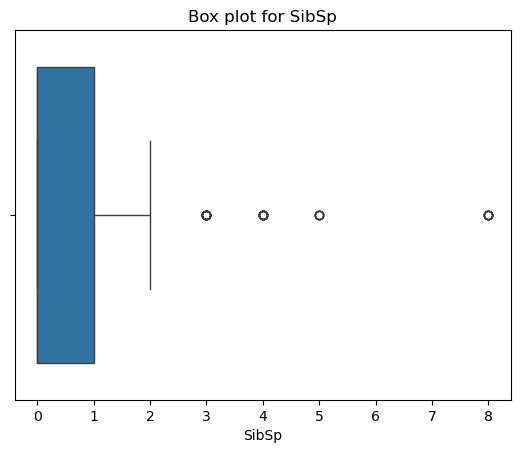

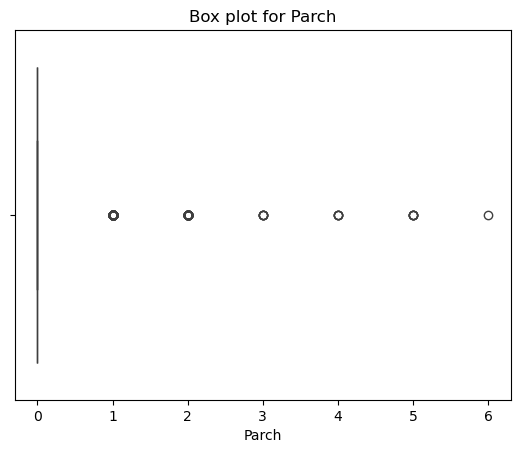

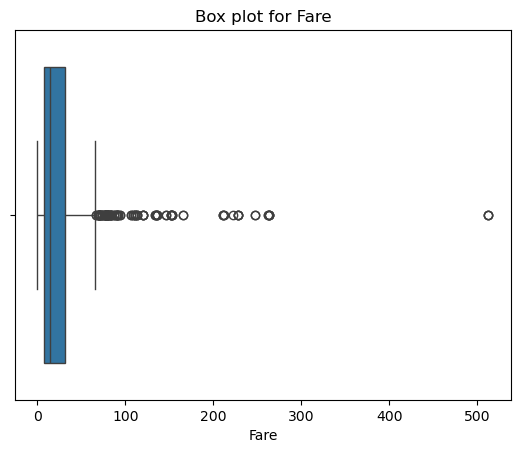

In [25]:
numeric_columns = df_train.select_dtypes(include=['number'])
for column in numeric_columns.columns:
      sns.boxplot(x=numeric_columns[column])
      plt.title(f'Box plot for {column}')
      plt.show()

In [26]:
def boxplot_numeric_columns(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number'])
    num_cols = len(numeric_columns.columns)
    plt.figure(figsize=(25, 5))
    for i, column in enumerate(numeric_columns.columns):
        plt.subplot(1, num_cols, i+1)
        sns.boxplot(x=numeric_columns[column])
        plt.title(f'Box plot for {column}')

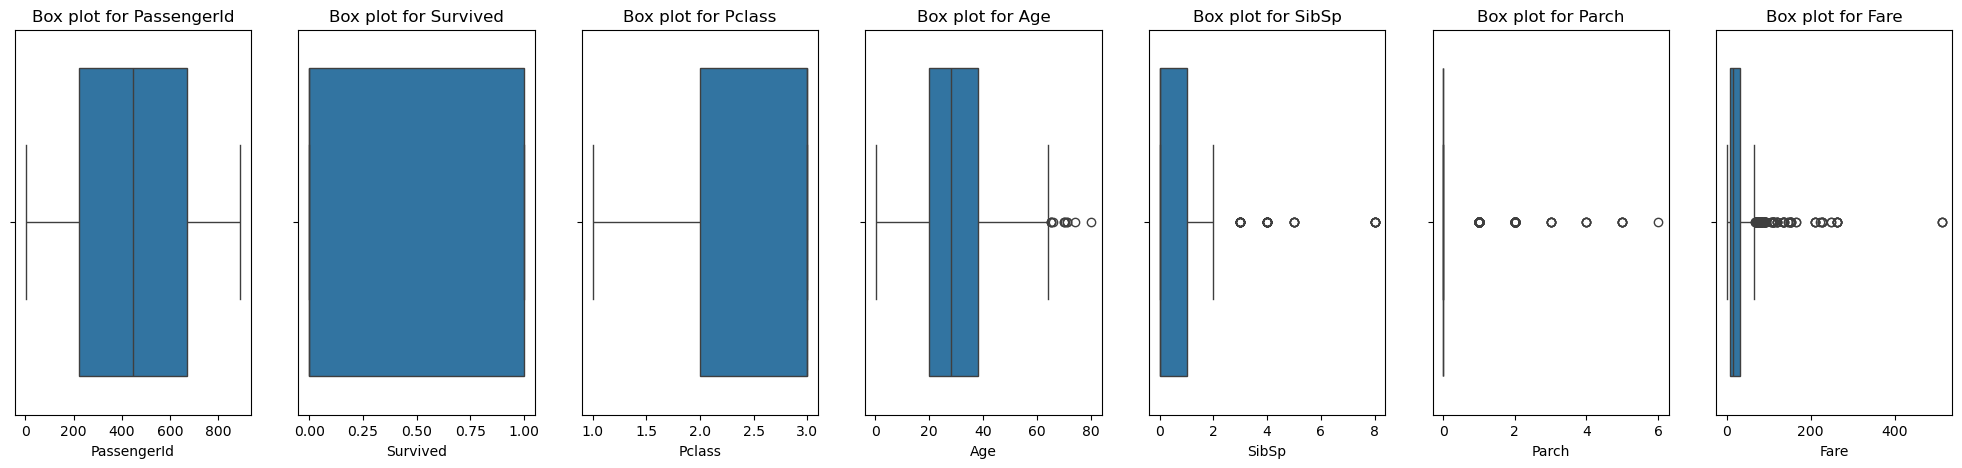

In [27]:
boxplot_numeric_columns(df_train)

<h3 style="font-family: 'Poppins', sans-serif; font-size: 20px; font-weight: 500;">Interpretations from the above boxenplots</h3>
<ul style="font-family: 'Poppins', sans-serif; font-size: 16px;">
    <li> Fare and age have outliers.</li>
</ul>

# 3. Data Preprocessing and Cleaning

<h3 style="font-family: 'Poppins', sans-serif; font-size: 20px; font-weight: 500;">What are the problems with this data as of now?</h3>
<ul style="font-family: 'Poppins', sans-serif; font-size: 16px;">
    <li>Passenger Id is irrelevant to the survival of people.</li>
    <li> Training Data  has missing values in Cabin, Age, Embarked, and Fare columns. I'll remove the cabin column as a whole as more than 70% of the data is missing.  </li>
    <li>Fare Column is skewed and model may predict based off the prices for which largest number of data is present. Common transformations to handle skewed variables include square root (sqrt(x)), logarithmic (log(x))  </li>
    <li>The names in this dataset have many titles such as Mr, Mrs, Miss, Duke, etc. We can separate people according to the titles and also I'll try to reduce these titles.</li>
</ul>

### Handing misssing Values (NaN)

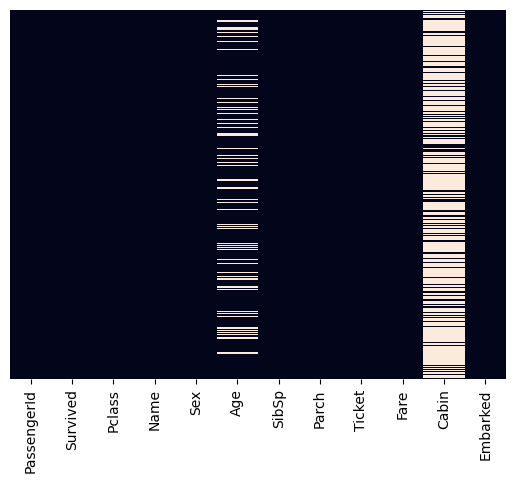

In [28]:
sns.heatmap(df_train.isnull() ,yticklabels=False,cbar=False,cmap="rocket");

In [29]:
train_data_groupby = df_train.groupby('Cabin',dropna=False)["Cabin"]


In [30]:
for i,n in train_data_groupby:
  print(i)
  print(n)

A10
583    A10
Name: Cabin, dtype: object
A14
475    A14
Name: Cabin, dtype: object
A16
556    A16
Name: Cabin, dtype: object
A19
284    A19
Name: Cabin, dtype: object
A20
599    A20
Name: Cabin, dtype: object
A23
630    A23
Name: Cabin, dtype: object
A24
867    A24
Name: Cabin, dtype: object
A26
647    A26
Name: Cabin, dtype: object
A31
209    A31
Name: Cabin, dtype: object
A32
185    A32
Name: Cabin, dtype: object
A34
445    A34
Name: Cabin, dtype: object
A36
806    A36
Name: Cabin, dtype: object
A5
96    A5
Name: Cabin, dtype: object
A6
23    A6
Name: Cabin, dtype: object
A7
174    A7
Name: Cabin, dtype: object
B101
737    B101
Name: Cabin, dtype: object
B102
815    B102
Name: Cabin, dtype: object
B18
329    B18
523    B18
Name: Cabin, dtype: object
B19
170    B19
Name: Cabin, dtype: object
B20
690    B20
781    B20
Name: Cabin, dtype: object
B22
540    B22
745    B22
Name: Cabin, dtype: object
B28
61     B28
829    B28
Name: Cabin, dtype: object
B3
779    B3
Name: Cabin, dtype: obj

In [31]:
# Cabin Column has too many missing values to be of any significant use
df_train.drop('Cabin', axis=1, inplace=True)

<h3 style="font-family: 'Poppins', sans-serif; color: #343f56; font-size: 18px; text-align: left;">Age Column</h3>

<p style="font-family: 'Poppins', sans-serif; font-size: 16px;">We can't obviously drop the whole age column like we did earlier. Instead I'm going to impute values into the missing and I'll do that by taking median age from each of the passenger class.</p>
<p style="font-family: 'Poppins', sans-serif; font-size: 16px;">Check out the relation between Age and Pclass </p>
<p style="font-family: 'Poppins', sans-serif; font-size: 16px;">So we replace the missing age of people by the median age of the class they were in.</p>


In [32]:
# df_train["Age"].median()
# df_train.fillna( df_train["Age"].median())

In [33]:
print('Training Data')
print('The median age of people in First Class: ',df_train[df_train['Pclass']==1]['Age'].median())
print('The median age of people in Second Class: ',df_train[df_train['Pclass']==2]['Age'].median())
print('The median age of people in Third Class: ',df_train[df_train['Pclass']==3]['Age'].median())

Training Data
The median age of people in First Class:  37.0
The median age of people in Second Class:  29.0
The median age of people in Third Class:  24.0


In [34]:
median_age_class1 = df_train[df_train['Pclass']==1]['Age'].median()
median_age_class2 = df_train[df_train['Pclass']==2]['Age'].median()
median_age_class3 = df_train[df_train['Pclass']==3]['Age'].median()

# Fill missing values in the 'Age' column based on passenger class
df_train.loc[df_train['Pclass']==1, 'Age'] = df_train[df_train['Pclass']==1]['Age'].fillna(median_age_class1)
df_train.loc[df_train['Pclass']==2, 'Age'] = df_train[df_train['Pclass']==2]['Age'].fillna(median_age_class2)
df_train.loc[df_train['Pclass']==3, 'Age'] = df_train[df_train['Pclass']==3]['Age'].fillna(median_age_class3)


In [35]:
df_train.loc[df_train['Pclass']==2, 'Age']

9      14.0
15     55.0
17     29.0
20     35.0
21     34.0
       ... 
866    27.0
874    28.0
880    25.0
883    28.0
886    27.0
Name: Age, Length: 184, dtype: float64

In [36]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [37]:
df_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [38]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')

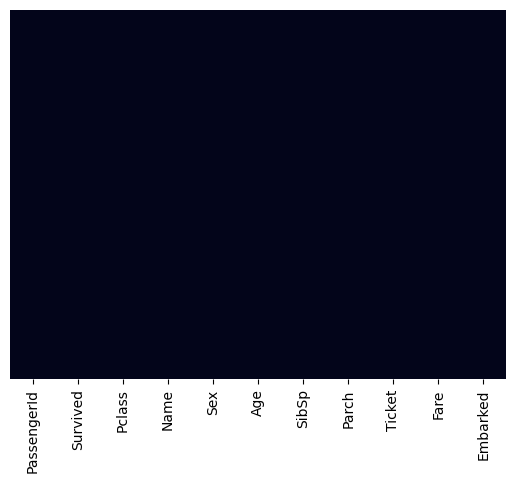

In [39]:
sns.heatmap(df_train.isnull() ,yticklabels=False,cbar=False,cmap="rocket");

### Duplicated

In [40]:
df_train.duplicated().sum()

0

###### No duplicates in the data (this is wrong)

In [41]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [42]:
df_train.drop(["PassengerId","Name",],axis=1).duplicated().sum()

15

In [43]:
index=df_train[df_train.drop(["PassengerId","Name",],axis=1).duplicated()].index

In [44]:
df_train.drop(index,axis=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [45]:
import pandas as pd

data = {
  "name": ["Sally", "Mary", "John"],
  "age": [50, 40, 30],
  "qualified": [True, False, False]
}
idx = ["X", "Y", "Z"]

df = pd.DataFrame(data, index=idx)

newdf = df.reset_index(drop=True)

print(newdf)


    name  age  qualified
0  Sally   50       True
1   Mary   40      False
2   John   30      False


In [46]:
def drop_duplicat(data,columns_uniques):
    index=data[data.drop(columns_uniques,axis=1).duplicated()].index
    print("Number of duplicated rows is",len(index))
    return data.drop(index,axis=0)

In [47]:
df_train=drop_duplicat(df_train,columns_uniques=["PassengerId","Name"])

Number of duplicated rows is 15


In [48]:
df_train.reset_index()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
872,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
873,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
874,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [49]:
df_train=df_train.reset_index(drop=True)

### Outlier Dectection (iqr)


In [50]:
q1, q3 = df_train["Age"].quantile([0.25,0.75])
iqr = q3 - q1
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr

In [51]:
outliers = df_train[(df_train["Age"]>upper_whisker) | (df_train["Age"]<lower_whisker)].index

In [52]:
outliers

Index([ 33,  54,  96, 116, 170, 251, 274, 279, 324, 364, 434, 452, 478, 487,
       539, 549, 564, 581, 618, 623, 663, 675, 684, 734, 817, 837],
      dtype='int64')

In [53]:
df_train.drop(outliers,axis=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
871,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
872,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
873,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
874,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [54]:
df_train[~(df_train["Survived"]==0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
...,...,...,...,...,...,...,...,...,...,...,...
860,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,C
864,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C
865,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,S
872,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S


In [55]:
def remove_outliers_iqr_countinuous(data, columns):
    for col in columns:
        if data[col].dtype != 'object':
            q1, q3 = data[col].quantile([0.25, 0.75])
            iqr = q3 - q1
            lower_whisker, upper_whisker = q1 - 1.5 * iqr, q3 + 1.5 * iqr
            filt = (data[col] < lower_whisker) | (data[col] > upper_whisker)
            data = data[~filt]
    return data.reset_index(drop=True)

In [56]:
df_train=remove_outliers_iqr_countinuous(df_train,["Fare"])

In [57]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
4,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...,...
759,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
760,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
761,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
762,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


### Outlier Dectection (Z Score)
#### The features are normally or approximately normally distributed.

In [58]:
(df_train["Age"] - df_train["Age"].mean() ) / df_train["Age"].std()

0     -0.490776
1     -0.183595
2      0.507563
3      0.507563
4     -0.337186
         ...   
759   -0.106800
760   -0.721162
761   -0.337186
762   -0.183595
763    0.277177
Name: Age, Length: 764, dtype: float64

In [59]:
outliers=df_train[((df_train["Age"] - df_train["Age"].mean() ) / df_train["Age"].std()<-3) | ((df_train["Age"] - df_train["Age"].mean() ) / df_train["Age"].std()>3)].index

In [60]:
df_train.drop(outliers,axis=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
4,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...,...
759,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
760,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
761,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
762,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [61]:
def remove_outliers_z_score_countinuous(data, upper_threshold=3, lower_threshold=-3):
    feature = data.select_dtypes(np.number).columns
    skewness = data[feature].skew()
    for column in feature:
        if -0.5 <= skewness[column] <= 0.5:
            z_scores = (data[column] - data[column].mean()) / data[column].std()
            outliers = (z_scores < lower_threshold) | (z_scores > upper_threshold)
            data = data[~outliers]
    return data.reset_index(drop=True)


In [62]:
remove_outliers_z_score_countinuous(df_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
4,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...,...
759,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
760,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
761,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
762,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [63]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
4,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...,...
759,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
760,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
761,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
762,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


### Skewness

In [64]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [65]:
def Skewness_log_square(data,numbers_of_cat_value):
    features = data.select_dtypes(np.number).columns
    for feature in features:
        if data[feature].nunique() <= numbers_of_cat_value:  # Check if unique values are greater than 10
            print(f" Categorical Features {feature} ")
            continue

        skewness = data[feature].skew()
        if skewness > 0.5:
            transformation = np.log1p
            transformation_name = "Log"
        elif skewness < -0.5:
            transformation = np.square
            transformation_name = "Square"
        else:
            print(f"Normal distribution {feature}")
            continue

        logTr = ColumnTransformer(transformers=[(transformation_name.lower(), FunctionTransformer(transformation), [feature])])
        plt.figure(figsize=(15,6))
        plt.subplot(1,2,1)
        plt.title(f"Distribution of {feature} before Transformation", fontsize=15)
        sns.histplot(data[feature], kde=True, color="red")
        plt.subplot(1,2,2)

        df_transformed = pd.DataFrame(logTr.fit_transform(data))
        plt.title(f"Distribution of {feature} after Transformation", fontsize=15)
        sns.histplot(df_transformed, bins=20, kde=True, legend=False)
        plt.xlabel(feature)
        plt.show()

        print(f"Skewness was {round(data[feature].skew(), 5)} before & is {round(df_transformed[0].skew(), 5)} after {transformation_name} transformation.")
        data[feature] = df_transformed[0]
    return data


Normal distribution PassengerId
 Categorical Features Survived 
 Categorical Features Pclass 


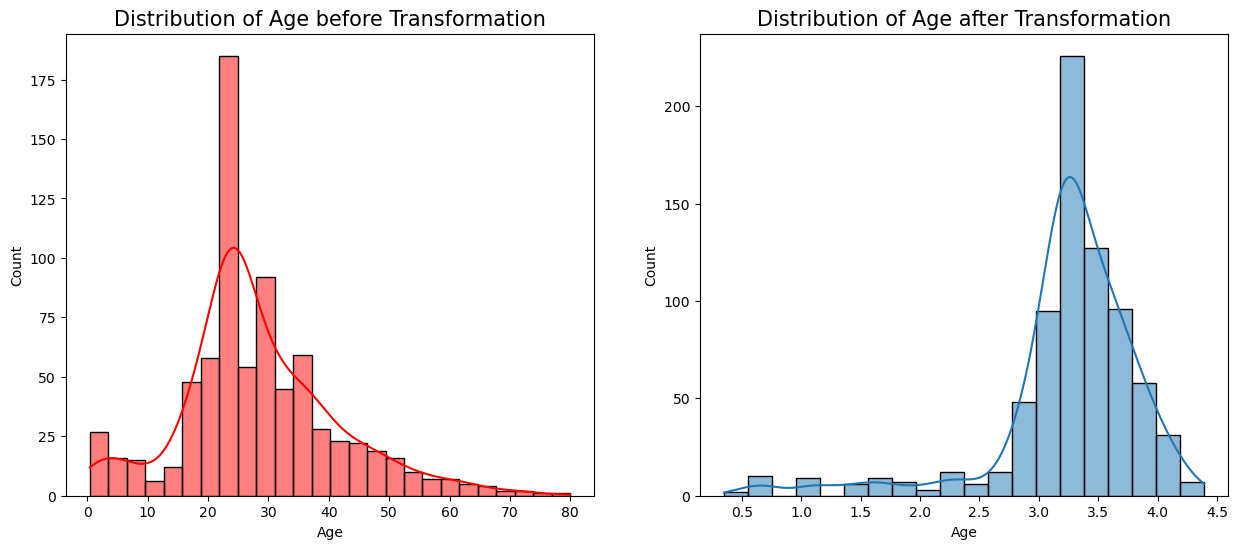

Skewness was 0.58832 before & is -2.0532 after Log transformation.
 Categorical Features SibSp 
 Categorical Features Parch 


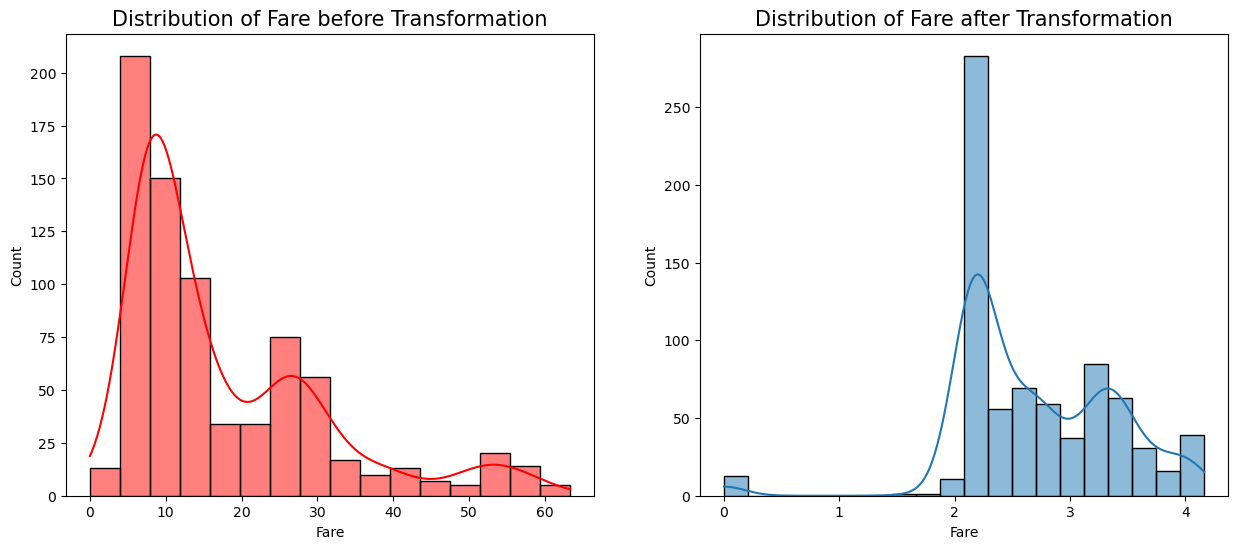

Skewness was 1.41983 before & is -0.44363 after Log transformation.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,3.135494,1,0,A/5 21171,2.110213,S
1,3,1,3,"Heikkinen, Miss. Laina",female,3.295837,0,0,STON/O2. 3101282,2.188856,S
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.583519,1,0,113803,3.990834,S
3,5,0,3,"Allen, Mr. William Henry",male,3.583519,0,0,373450,2.202765,S
4,6,0,3,"Moran, Mr. James",male,3.218876,0,0,330877,2.246893,Q
...,...,...,...,...,...,...,...,...,...,...,...
759,887,0,2,"Montvila, Rev. Juozas",male,3.332205,0,0,211536,2.639057,S
760,888,1,1,"Graham, Miss. Margaret Edith",female,2.995732,0,0,112053,3.433987,S
761,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,3.218876,1,2,W./C. 6607,3.196630,S
762,890,1,1,"Behr, Mr. Karl Howell",male,3.295837,0,0,111369,3.433987,C


In [66]:
Skewness_log_square(df_train,10)

### Removing Irrelevant Columns


In [67]:
df_train.drop(["Name","PassengerId"], axis=1, inplace=True)

In [68]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,3.135494,1,0,A/5 21171,2.110213,S
1,1,3,female,3.295837,0,0,STON/O2. 3101282,2.188856,S
2,1,1,female,3.583519,1,0,113803,3.990834,S
3,0,3,male,3.583519,0,0,373450,2.202765,S
4,0,3,male,3.218876,0,0,330877,2.246893,Q
...,...,...,...,...,...,...,...,...,...
759,0,2,male,3.332205,0,0,211536,2.639057,S
760,1,1,female,2.995732,0,0,112053,3.433987,S
761,0,3,female,3.218876,1,2,W./C. 6607,3.196630,S
762,1,1,male,3.295837,0,0,111369,3.433987,C


# 4. Encoding Categorical Columns

In [69]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,3.135494,1,0,A/5 21171,2.110213,S
1,1,3,female,3.295837,0,0,STON/O2. 3101282,2.188856,S
2,1,1,female,3.583519,1,0,113803,3.990834,S
3,0,3,male,3.583519,0,0,373450,2.202765,S
4,0,3,male,3.218876,0,0,330877,2.246893,Q
...,...,...,...,...,...,...,...,...,...
759,0,2,male,3.332205,0,0,211536,2.639057,S
760,1,1,female,2.995732,0,0,112053,3.433987,S
761,0,3,female,3.218876,1,2,W./C. 6607,3.196630,S
762,1,1,male,3.295837,0,0,111369,3.433987,C


### OneHotEncoder

In [70]:
from sklearn.preprocessing import OneHotEncoder

In [71]:
info_cat=df_train[["Ticket"]]
info_cat.head(10)

,Ticket
0,A/5 21171
1,STON/O2. 3101282
2,113803
3,373450
4,330877
5,17463
6,349909
7,347742
8,237736
9,PP 9549


In [72]:
info_cat["Ticket"].nunique()

631

In [73]:
#converting to numerical data using OneHotEncoder
ohe=OneHotEncoder()
info_cat_1hot=ohe.fit_transform(info_cat)

In [74]:
info_cat_1hot

<764x631 sparse matrix of type '<class 'numpy.float64'>'
	with 764 stored elements in Compressed Sparse Row format>

In [75]:
info_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [76]:
len(ohe.get_feature_names_out())

631

In [77]:
info_cat_1hot_df = pd.DataFrame(info_cat_1hot.toarray(), columns=ohe.get_feature_names_out())

In [78]:
df_train_copy=df_train.copy()

In [79]:
df_train.merge(info_cat_1hot_df,left_index=True, right_index=True)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket_110465,...,Ticket_STON/O2. 3101283,Ticket_STON/O2. 3101290,Ticket_SW/PP 751,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208
0,0,3,male,3.135494,1,0,A/5 21171,2.110213,S,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3,female,3.295837,0,0,STON/O2. 3101282,2.188856,S,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,female,3.583519,1,0,113803,3.990834,S,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,3,male,3.583519,0,0,373450,2.202765,S,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,3,male,3.218876,0,0,330877,2.246893,Q,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,0,2,male,3.332205,0,0,211536,2.639057,S,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
760,1,1,female,2.995732,0,0,112053,3.433987,S,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
761,0,3,female,3.218876,1,2,W./C. 6607,3.196630,S,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
762,1,1,male,3.295837,0,0,111369,3.433987,C,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
# creating the Series
series1 = pd.Series([1, 2, 3])
print('series1:', series1)
series2 = pd.Series(['A', 'B', 'C'])
print('series2:', series2)

# concatenating
print('After concatenating:')
pd.concat([series1, series2],axis=0)

series1: 0    1
1    2
2    3
dtype: int64
series2: 0    A
1    B
2    C
dtype: object
After concatenating:


0    1
1    2
2    3
0    A
1    B
2    C
dtype: object

In [81]:
# creating the Series
series1 = pd.Series([1, 2, 3])
print('series1:', series1)
series2 = pd.Series(['A', 'B', 'C'])
print('series2:', series2)

# concatenating
print('After concatenating:')
pd.concat([series1, series2],axis=1)

series1: 0    1
1    2
2    3
dtype: int64
series2: 0    A
1    B
2    C
dtype: object
After concatenating:


,0,1
0,1,A
1,2,B
2,3,C


In [82]:
df_train_ohe = pd.concat([info_cat_1hot_df, df_train], axis=1)

In [83]:
df_train_ohe

,Ticket_110465,Ticket_110564,Ticket_111240,Ticket_111320,Ticket_111361,Ticket_111369,Ticket_111426,Ticket_111427,Ticket_111428,Ticket_112050,...,Ticket_W/C 14208,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,3,male,3.135494,1,0,A/5 21171,2.110213,S
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,3,female,3.295837,0,0,STON/O2. 3101282,2.188856,S
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,1,female,3.583519,1,0,113803,3.990834,S
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,3,male,3.583519,0,0,373450,2.202765,S
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,3,male,3.218876,0,0,330877,2.246893,Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,2,male,3.332205,0,0,211536,2.639057,S
760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,1,female,2.995732,0,0,112053,3.433987,S
761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,3,female,3.218876,1,2,W./C. 6607,3.196630,S
762,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1,1,male,3.295837,0,0,111369,3.433987,C


In [84]:
column = df_train_ohe.pop("Ticket_110465")
df_train_ohe.insert(634, "Ticket_110465", column)

In [85]:
df_train_ohe

,Ticket_110564,Ticket_111240,Ticket_111320,Ticket_111361,Ticket_111369,Ticket_111426,Ticket_111427,Ticket_111428,Ticket_112050,Ticket_112052,...,Survived,Pclass,Sex,Age,Ticket_110465,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,3,male,3.135494,0.0,1,0,A/5 21171,2.110213,S
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,3,female,3.295837,0.0,0,0,STON/O2. 3101282,2.188856,S
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,female,3.583519,0.0,1,0,113803,3.990834,S
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,3,male,3.583519,0.0,0,0,373450,2.202765,S
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,3,male,3.218876,0.0,0,0,330877,2.246893,Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,2,male,3.332205,0.0,0,0,211536,2.639057,S
760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,female,2.995732,0.0,0,0,112053,3.433987,S
761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,3,female,3.218876,0.0,1,2,W./C. 6607,3.196630,S
762,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,1,male,3.295837,0.0,0,0,111369,3.433987,C


### Dummy encoding

In [86]:
df_train_get_dummies = pd.get_dummies(df_train_copy["Ticket"],drop_first=True)
# df_train_get_dummies_1 = pd.get_dummies(df_train_copy,columns=["Ticket","Sex",""],prefix=["Ticket","Sex"],drop_first=True)

In [87]:
df_train_get_dummies = pd.concat([df_train_get_dummies, df_train], axis=1)

In [88]:
df_train_get_dummies

,110564,111240,111320,111361,111369,111426,111427,111428,112050,112052,...,W/C 14208,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,False,False,False,False,False,False,False,False,False,False,...,False,0,3,male,3.135494,1,0,A/5 21171,2.110213,S
1,False,False,False,False,False,False,False,False,False,False,...,False,1,3,female,3.295837,0,0,STON/O2. 3101282,2.188856,S
2,False,False,False,False,False,False,False,False,False,False,...,False,1,1,female,3.583519,1,0,113803,3.990834,S
3,False,False,False,False,False,False,False,False,False,False,...,False,0,3,male,3.583519,0,0,373450,2.202765,S
4,False,False,False,False,False,False,False,False,False,False,...,False,0,3,male,3.218876,0,0,330877,2.246893,Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,False,False,False,False,False,False,False,False,False,False,...,False,0,2,male,3.332205,0,0,211536,2.639057,S
760,False,False,False,False,False,False,False,False,False,False,...,False,1,1,female,2.995732,0,0,112053,3.433987,S
761,False,False,False,False,False,False,False,False,False,False,...,False,0,3,female,3.218876,1,2,W./C. 6607,3.196630,S
762,False,False,False,False,True,False,False,False,False,False,...,False,1,1,male,3.295837,0,0,111369,3.433987,C


### LabelEncoder

In [89]:
df_train_copy

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,3.135494,1,0,A/5 21171,2.110213,S
1,1,3,female,3.295837,0,0,STON/O2. 3101282,2.188856,S
2,1,1,female,3.583519,1,0,113803,3.990834,S
3,0,3,male,3.583519,0,0,373450,2.202765,S
4,0,3,male,3.218876,0,0,330877,2.246893,Q
...,...,...,...,...,...,...,...,...,...
759,0,2,male,3.332205,0,0,211536,2.639057,S
760,1,1,female,2.995732,0,0,112053,3.433987,S
761,0,3,female,3.218876,1,2,W./C. 6607,3.196630,S
762,1,1,male,3.295837,0,0,111369,3.433987,C


In [90]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [91]:
df_train_copy["Ticket_LabelEncoder"] = le.fit_transform(df_train_copy["Ticket"])
df_train_copy

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket_LabelEncoder
0,0,3,male,3.135494,1,0,A/5 21171,2.110213,S,494
1,1,3,female,3.295837,0,0,STON/O2. 3101282,2.188856,S,620
2,1,1,female,3.583519,1,0,113803,3.990834,S,41
3,0,3,male,3.583519,0,0,373450,2.202765,S,443
4,0,3,male,3.218876,0,0,330877,2.246893,Q,252
...,...,...,...,...,...,...,...,...,...,...
759,0,2,male,3.332205,0,0,211536,2.639057,S,80
760,1,1,female,2.995732,0,0,112053,3.433987,S,11
761,0,3,female,3.218876,1,2,W./C. 6607,3.196630,S,626
762,1,1,male,3.295837,0,0,111369,3.433987,C,5


### OrdinalEncoder

In [92]:
from sklearn.preprocessing import OrdinalEncoder
Rank=['S','Q','C']
le=OrdinalEncoder(categories=[Rank])
df_train_copy['Embarked']=le.fit_transform(df_train_copy[['Embarked']])
df_train_copy['Embarked'].unique()

array([0., 1., 2.])

In [93]:
df_train_copy

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket_LabelEncoder
0,0,3,male,3.135494,1,0,A/5 21171,2.110213,0.0,494
1,1,3,female,3.295837,0,0,STON/O2. 3101282,2.188856,0.0,620
2,1,1,female,3.583519,1,0,113803,3.990834,0.0,41
3,0,3,male,3.583519,0,0,373450,2.202765,0.0,443
4,0,3,male,3.218876,0,0,330877,2.246893,1.0,252
...,...,...,...,...,...,...,...,...,...,...
759,0,2,male,3.332205,0,0,211536,2.639057,0.0,80
760,1,1,female,2.995732,0,0,112053,3.433987,0.0,11
761,0,3,female,3.218876,1,2,W./C. 6607,3.196630,0.0,626
762,1,1,male,3.295837,0,0,111369,3.433987,2.0,5


In [94]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,3.135494,1,0,A/5 21171,2.110213,S
1,1,3,female,3.295837,0,0,STON/O2. 3101282,2.188856,S
2,1,1,female,3.583519,1,0,113803,3.990834,S
3,0,3,male,3.583519,0,0,373450,2.202765,S
4,0,3,male,3.218876,0,0,330877,2.246893,Q
...,...,...,...,...,...,...,...,...,...
759,0,2,male,3.332205,0,0,211536,2.639057,S
760,1,1,female,2.995732,0,0,112053,3.433987,S
761,0,3,female,3.218876,1,2,W./C. 6607,3.196630,S
762,1,1,male,3.295837,0,0,111369,3.433987,C


### Lets determend which encoding will use

##### Sex - -  - - - - > OrdinalEncoder
##### Embarked - -  - - - - > Dummy encoding

In [95]:
from sklearn.preprocessing import OrdinalEncoder
Rank=["female","male"]
ordinal_encoder = OrdinalEncoder(categories=[Rank])
df_train['Sex'] = ordinal_encoder.fit_transform(df_train[['Sex']])

df_train_get_dummies = pd.get_dummies(df_train["Embarked"],drop_first=True)
df = pd.concat([df_train, df_train_get_dummies], axis=1)
df.drop(["Embarked","Ticket"],axis=1,inplace=True)

In [96]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1.0,3.135494,1,0,2.110213,False,True
1,1,3,0.0,3.295837,0,0,2.188856,False,True
2,1,1,0.0,3.583519,1,0,3.990834,False,True
3,0,3,1.0,3.583519,0,0,2.202765,False,True
4,0,3,1.0,3.218876,0,0,2.246893,True,False
...,...,...,...,...,...,...,...,...,...
759,0,2,1.0,3.332205,0,0,2.639057,False,True
760,1,1,0.0,2.995732,0,0,3.433987,False,True
761,0,3,0.0,3.218876,1,2,3.196630,False,True
762,1,1,1.0,3.295837,0,0,3.433987,False,False


# Split dataset into training and test set

In [97]:
from sklearn.model_selection import train_test_split
X = df.drop(['Survived'],axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

`fit` computes the mean and stdev to be used for later scaling, note it's just a computation with no scaling done.

`transform` uses the previously computed mean and stdev to scale the data (subtract mean from all values and then divide it by stdev).

`fit_transform` does both at the same time. So you can do it with just 1 line of code.

**We want the same scale for both training and testing data**

`X_test` data should be totally **unseen** and **unknown** (ie, no info is extracted from them), so we can only derive info from X_train. The reason why we apply the derived mean and stdev (from X_train) to transform X_test as well,

##### Why we use Fit_transform on the train set but just transform on the test set?

Why we use Fit_transform on the train set but just transform on the test set?
Why don't we use the same fit_transform for both? As fit_transform() scaling learns the parameter of data and scales it. We want the same scale for both training and testing data. We also want to make unknown the test data from our model so that we don't scale by this data.

# Feature Scaling

In [98]:
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()
X_train_scale=rob_scaler.fit_transform(X_train)
X_test_scale=rob_scaler.transform(X_test)

In [99]:
X_test_scale

array([[-1.        ,  0.        ,  0.28653858, ...,  0.        ,
         0.        ,  0.        ],
       [-1.        ,  0.        ,  0.6535118 , ..., -0.00807801,
         0.        , -1.        ],
       [ 0.        ,  0.        , -0.52125301, ..., -0.2299281 ,
         0.        ,  0.        ],
       ...,
       [ 0.        , -1.        ,  0.7088246 , ..., -0.25163824,
         0.        ,  0.        ],
       [-2.        ,  0.        ,  0.7088246 , ...,  0.85066889,
         0.        ,  0.        ],
       [ 0.        , -1.        , -2.06011044, ...,  0.65280729,
         0.        ,  0.        ]])

In [100]:
df_test=pd.read_csv("/content/test (1).csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/test (1).csv'

In [ ]:
df_test

# Extra

### This is the loop used to drop the categorical outliers


In [ ]:
Seriers=df_test["Cabin"].value_counts()

In [ ]:
Seriers[Seriers<11]

In [ ]:
outliers=Seriers[Seriers<11].index

In [ ]:
outliers

In [ ]:
df_test[df_test["Sex"].isin(["male"])]

In [ ]:
[df_test["Cabin"].isin(outliers)]

In [ ]:
def remove_categorical_outliers(data, columns, threshold):
    for col in columns:
        series = data[col].value_counts()
        outliers = series[series < threshold].index
        data = data[~data[col].isin(outliers)]
        print(col,np.array(outliers))
    return data.reset_index(drop=True)

In [ ]:
threshold = 11
df_cleaned = remove_categorical_outliers(df_test, ["Cabin","Pclass","Parch"], threshold)

In [ ]:
df_cleaned


# Models